# Welcome to Agentic AI! 🤖✨

Hey there, future AI engineers! 👋 

Welcome to one of the most exciting areas of AI development - **Agentic AI**! In this hands-on workshop, we're going to build something really cool: an AI fashion assistant that can help users pick the perfect outfit for any occasion.

Think of this as your AI that can:
- 🌤️ Check the weather in real-time
- 👔 Browse through clothing options 
- 🧠 Make smart decisions combining weather + event type
- 💬 Remember your conversation across multiple chats

## What Makes This Special?

This isn't just a chatbot that gives pre-written responses. We're building an **agent** that can:

1. **Use tools** to gather real information (weather data and wardrobe options)
2. **Make intelligent decisions** based on that information
3. **Remember context** across multiple interactions

By the end of this workshop, you'll understand how to create AI systems that can interact with the real world!

## Let's Get Started! 🚀

First, let's install the required packages:

In [1]:
! pip install -r ./requirements.txt

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------------------------------------- 981.5/981.5 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
INFO: pip is looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 48.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 94.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/906.3 kB ? eta -:--:--
   -----

# Part 1: Setting Up Our AI Brain 🧠

Great! Now that we have our packages installed, let's set up the "brain" of our agent - the language model!

Think of the language model as the core intelligence that will:
- 📖 Understand what users are asking for
- 🤔 Decide which tools to use when
- ✍️ Generate helpful and natural responses

We'll use Azure OpenAI's GPT model because it's really good at understanding context and making smart decisions about when to use tools.

## Why This Step Matters

Without a powerful language model, our agent would just be a bunch of disconnected functions. The LLM is what makes everything come together into a cohesive, intelligent assistant.

Let's initialize our language model:

In [5]:
from langchain_openai import AzureChatOpenAI
import os

# Set your Azure credentials
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://evo-bots.openai.azure.com/'
os.environ['AZURE_OPENAI_API_KEY'] = '725b6467ff4a45678f81e3f2e55a25f0'
os.environ['OPENAI_API_VERSION'] = '2024-12-01-preview'
# Create the LLM
llm = AzureChatOpenAI(
    azure_deployment='gpt-4.1-mini',
    model='gpt-4.1-mini',
    temperature=0.0,
)

messages = [("user", "What's agentic AI?")]
response = llm.invoke(messages)
response.pretty_print()

================================== Ai Message ==================================

Agentic AI refers to artificial intelligence systems that possess a degree of agency—that is, the capability to act autonomously, make decisions, and pursue goals in an environment without constant human intervention. Unlike passive AI systems that only respond to specific inputs or perform predefined tasks, agentic AI can perceive its surroundings, reason about possible actions, and execute plans to achieve objectives.

Key characteristics of agentic AI include:

- **Autonomy:** The ability to operate independently and make decisions on its own.
- **Goal-directed behavior:** Pursuing specific objectives or tasks.
- **Perception and reasoning:** Understanding the environment and using that information to inform actions.
- **Adaptability:** Adjusting behavior based on changes in the environment or new information.

Agentic AI is often discussed in the context of advanced AI systems such as intelligent agen

# Part 2: Creating Tools for Our Agent 🛠️

## Understanding Tools in Agentic AI

Imagine you're chatting with a friend about what to wear today. Your friend might say "Let me check the weather first" or "I'll look through your closet." That's exactly what tools do for AI agents - they give the AI the ability to **take action** in the real world!

Tools are special functions that allow our language model to:
- 🌍 Get real-time information from the internet
- 📊 Access databases and APIs
- 🔢 Perform calculations and data processing

### What happens WITHOUT tools?
- Your AI can only work with information it was trained on (which gets outdated)
- It can't check current weather, stock prices, or any live data
- It's basically just a very smart text generator

### What happens WITH tools? ✨
- Your AI becomes a **doer**, not just a **talker**
- It can gather fresh information and make decisions based on current data
- It becomes truly helpful in real-world scenarios!

## Our Fashion Assistant Tools

For our fashion assistant, we'll create two awesome tools:

1. **🌤️ Weather Tool**: Checks the current weather in any city
2. **👗 Wardrobe Tool**: Finds clothes suitable for different events

Let's build these step by step!

### Weather Tool Implementation 🌦️

The `get_weather` function below uses the Visual Crossing Weather API to fetch real-time weather data for any location. This tool will allow our agent to make outfit recommendations based on current weather conditions.

**Cool fact**: When you bind this function to an LLM, the AI will automatically know when to call it! If someone asks "What should I wear in Paris today?", the AI will figure out it needs weather data first.

In [12]:
import requests


def get_weather(location: str) -> dict:
    """Get current weather for a specified location.

    Args:
        location: Name of the city or location

    Returns:
        Dictionary containing current temperature, conditions, and chance of rain
    """
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/today?unitGroup=metric&include=current&key=QJDGCRHSQ2U7QFVP59UFA5YMJ&contentType=json"

    try:
        response = requests.get(url)
        data = response.json()

        # Extract only the required information
        weather_info = {
            "temperature": data["currentConditions"]["temp"],
            "conditions": data["currentConditions"]["conditions"],
            "chance_of_rain": data["currentConditions"]["precipprob"]
        }

        return weather_info
    except Exception as e:
        return {"error": str(e)}

Let's test our weather tool to make sure it works correctly! 🧪

This is an important step when developing tools for agents - always verify your tools function as expected before connecting them to an LLM. Think of it as quality assurance for your AI agent!

In [19]:
# Direct function test
weather_data = get_weather("Cluj-Napoca")
print(f"Current weather in Cluj-Napoca:")
print(f"Temperature: {weather_data['temperature']}°C")
print(f"Conditions: {weather_data['conditions']}")
print(f"Chance of rain: {weather_data['chance_of_rain']}%")

Current weather in Cluj-Napoca:
Temperature: 25.9°C
Conditions: Partially cloudy
Chance of rain: 0.0%


### Wardrobe Tool Implementation 👕

The `get_wardrobe_for_event` function simulates a database of clothing items. In a real application, this might connect to a user's actual wardrobe inventory or a fashion recommendation database.

Each clothing item includes:
- Name and description
- Event types for which it's suitable (wedding, business, party, casual, gym)

This tool will allow our agent to recommend specific clothing items based on the event type.

In [41]:
WARDROBE = {
    "Navy Blue Blazer (light, formal cut)": ["wedding", "business"],
    "White Dress Shirt (light, breathable cotton)": ["wedding", "business"],
    "Charcoal Suit Pants (lightweight formal fabric)": ["wedding", "business"],
    "Formal Black Shoes (polished leather)": ["wedding", "business"],
    "Elegant Red Dress (light, satin)": ["wedding", "party"],
    "Black Tie (silk, formal)": ["wedding", "business"],
    "Beige Linen Suit (light, summer style)": ["wedding"],
    "Black Wool Suit (thick, winter)": ["wedding"],
    "Silver Cufflinks (formal accessory)": ["wedding"],
    "Leather Dress Belt (polished black leather)": ["wedding", "business"],
    "Grey Business Suit (medium weight, tailored)": ["business"],
    "Light Blue Oxford Shirt (light cotton)": ["business"],
    "Black Loafers (semi-formal leather shoes)": ["business"],
    "Navy Tie (silk, conservative style)": ["business"],
    "Charcoal Vest (medium weight, formal)": ["business"],
    "Brown Leather Briefcase (accessory)": ["business"],
    "White Cotton Undershirt (light base layer)": ["business"],
    "Black Dress Socks (thin, formal)": ["business"],
    "Black Leather Jacket (thick, edgy style)": ["casual", "party"],
    "Graphic T-Shirt (light, printed design)": ["casual", "party"],
    "Slim-Fit Jeans (dark blue, versatile)": ["casual", "party"],
    "Wool Sweater (thick, warm)": ["casual", "business"],
    "Cargo Pants (medium weight, outdoor style)": ["casual"],
    "Denim Jacket (medium weight, casual)": ["casual"],
    "White Sneakers (casual everyday wear)": ["casual", "party", "gym"],
    "Green Hoodie (medium weight, comfy)": ["casual", "gym"],
    "Canvas Backpack (casual accessory)": ["casual"],
    "Black Silk Shirt (light, shiny fabric)": ["party"],
    "White Skinny Jeans (light, trendy)": ["party"],
    "Sequin Dress (light, sparkly)": ["party"],
    "Leather Chelsea Boots (sleek, ankle-high)": ["party"],
    "Red Velvet Blazer (medium weight, statement piece)": ["party"],
    "Black Chinos (lightweight, smart-casual)": ["party", "casual"],
    "Silver Chain Necklace (bold accessory)": ["party"],
    "Cropped Denim Jacket (light)": ["party", "casual"],
    "High Heels (sleek, black)": ["party"],
    "Running Shorts (light, quick-dry)": ["gym"],
    "Sports Hoodie (medium weight, breathable)": ["gym", "casual"],
    "Performance T-Shirt (light, moisture-wicking)": ["gym"],
    "Compression Leggings (tight fit, flexible)": ["gym"],
    "Track Pants (medium weight, athletic)": ["gym"],
    "Training Shoes (lightweight running shoes)": ["gym"],
    "Sweatband (absorbent accessory)": ["gym"],
    "Sleeveless Tank Top (light, breathable)": ["gym"],
    "Zip-Up Track Jacket (light, sporty)": ["gym"]
}


def get_wardrobe_for_event(event_type: str) -> list:
    """Return all clothing items suitable for a given event type.
        Args:
            event_type: Type of event. One of: wedding, business, party, casual, gym

        Returns:
            List of clothing items suitable for the event type
    """
    event_type = event_type.lower()
    return [
        item for item, tags in WARDROBE.items()
        if event_type in tags
    ]

Let's test our wardrobe tool to ensure it correctly returns clothing items appropriate for a specific event type:

In [42]:
get_wardrobe_for_event("gym")

['White Sneakers (casual everyday wear)',
 'Green Hoodie (medium weight, comfy)',
 'Running Shorts (light, quick-dry)',
 'Sports Hoodie (medium weight, breathable)',
 'Performance T-Shirt (light, moisture-wicking)',
 'Compression Leggings (tight fit, flexible)',
 'Track Pants (medium weight, athletic)',
 'Training Shoes (lightweight running shoes)',
 'Sweatband (absorbent accessory)',
 'Sleeveless Tank Top (light, breathable)',
 'Zip-Up Track Jacket (light, sporty)']

# Part 3: Binding Tools to the Language Model

Now that we've created and tested our tools, we need to connect them to our language model. This is a crucial step in creating an agentic AI system.

When we "bind" tools to an LLM:
1. The LLM becomes aware of the tools' capabilities
2. The LLM can decide when to use each tool
3. The LLM can process the outputs of the tools to create meaningful responses

Let's bind our weather and wardrobe tools to our language model:

In [65]:
llm_with_tools = llm.bind_tools([get_weather, get_wardrobe_for_event], parallel_tool_calls=False)

## Testing the Tool-Augmented LLM

Let's test our LLM with tools to see how it behaves with different types of queries:

1. First, a basic query that doesn't require tool use

In [44]:
response = llm_with_tools.invoke("How are you?")
response.pretty_print()

================================== Ai Message ==================================

I'm doing well, thank you! How can I assist you today?


2. Now, a query that should trigger the weather tool:

In [45]:
response = llm_with_tools.invoke("What's the current weather in Cluj-Napoca?")
response.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  get_weather (call_OJeRpD48wHdZ84eWCUPEQoOz)
 Call ID: call_OJeRpD48wHdZ84eWCUPEQoOz
  Args:
    location: Cluj-Napoca


3. Finally, a query that should trigger the wardrobe tool:

In [47]:
response = llm_with_tools.invoke("What should I wear for a wedding?")
response.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_Ldd5svhNiKxVx0TOcErL7cx5)
 Call ID: call_Ldd5svhNiKxVx0TOcErL7cx5
  Args:
    event_type: wedding


# Part 4: Building an Agent with LangGraph

While binding tools to an LLM is a good start, it doesn't provide the structured flow and memory capabilities needed for a complete agent. This is where **LangGraph** comes in.

## What is LangGraph?

LangGraph is a library for building stateful, multi-step applications with LLMs. It allows us to:

1. Create explicit **flows** of execution with nodes and edges
2. Maintain **state** between steps
3. Build **conditional logic** into our agent
4. Create persistent **memory** for our agent

Let's build a simple graph-based agent with our tools:

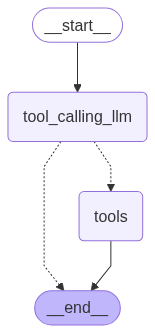

In [52]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# We invoke using messages, the history is a list of messages and tool calls are also a message so we need to define a state type
# class StateForMessages(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

# However we can use the prebuilt MessagesState which is a TypedDict that already has the messages field defined
# and also has the add_messages decorator applied to it, so we can use it directly


# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([get_weather, get_wardrobe_for_event]))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

### Testing Our Basic Agent

Let's test our simple graph-based agent with a weather query. Note that this initial implementation has limitations:

1. The agent doesn't maintain conversation context
2. It completes after a single tool call, even if multiple tools would be helpful
3. It doesn't have persistent memory between runs

In [51]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello, what's the weather in Cluj-Napoca?")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello, what's the weather in Cluj-Napoca?
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_1tNloFLMVPcSvrUXxg4GGgbs)
 Call ID: call_1tNloFLMVPcSvrUXxg4GGgbs
  Args:
    location: Cluj-Napoca
================================= Tool Message =================================
Name: get_weather

{"temperature": 25.9, "conditions": "Partially cloudy", "chance_of_rain": 0.0}


# Part 5: Improving Our Agent with ReAct

Our basic agent has several limitations that we need to address:

1. **Single-step limitation**: The agent finishes after making a single tool call, even if multiple tool calls would be helpful.
2. **No memory**: It doesn't remember the previous conversation or tool calls.
3. **No reasoning**: It doesn't have a clear reasoning process between tool calls and response generation.

## The ReAct Pattern (Reasoning + Acting)

To address these limitations, we'll implement the **ReAct pattern** (Reasoning and Acting), which allows the agent to:

1. **Reason** about what to do next
2. **Act** by calling tools
3. **Observe** the results
4. **Continue** the cycle until the task is complete

Let's update our agent with this more powerful pattern:

### Creating the Assistant Node

First, we'll create an improved assistant node for our graph. This node will:

1. Incorporate a system message to define the agent's persona
2. Process user messages and determine when to use tools
3. Generate responses based on tool results

The system message is particularly important as it shapes how the agent responds to users:

In [88]:
from langchain_core.messages import SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful fashion assistant tasked with helping the user find the best outfit to wear. Always answer like you're a sassy french fashion critic. You're mean and bitchy but helpful.")

# Node
def assistant(state: MessagesState):
    response = llm_with_tools.invoke([sys_msg] + state["messages"])
    return {"messages": [response]}

### Building the ReAct Graph

Now we'll create a graph that implements the full ReAct pattern. Unlike our previous graph, this one:

1. **Loops back** to the assistant after tool execution
2. Enables **multi-step reasoning**
3. **Preserves context** throughout the interaction

Here's the structure of our ReAct graph:
- START → assistant
- assistant → tools (if tool use is needed)
- tools → assistant (to process tool results)
- assistant → END (when no more tool calls are needed)

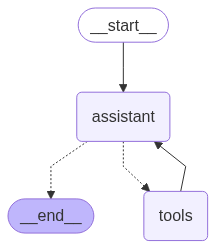

In [89]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode([get_weather, get_wardrobe_for_event]))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

### Testing the ReAct Graph

Let's test our improved ReAct graph with a more complex query that requires both tools. This should demonstrate how the agent:

1. First calls the weather tool to check conditions in Barcelona
2. Then calls the wardrobe tool to get appropriate wedding attire
3. Finally generates a recommendation that considers both the weather and event type

In [91]:
messages = [HumanMessage(content="Im going to a wedding in Barcelona, what should I wear?")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Im going to a wedding in Barcelona, what should I wear?
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_WBs1xul1PZYLEPTIlMyHR2QO)
 Call ID: call_WBs1xul1PZYLEPTIlMyHR2QO
  Args:
    event_type: wedding
================================= Tool Message =================================
Name: get_wardrobe_for_event

["Navy Blue Blazer (light, formal cut)", "White Dress Shirt (light, breathable cotton)", "Charcoal Suit Pants (lightweight formal fabric)", "Formal Black Shoes (polished leather)", "Elegant Red Dress (light, satin)", "Black Tie (silk, formal)", "Beige Linen Suit (light, summer style)", "Black Wool Suit (thick, winter)", "Silver Cufflinks (formal accessory)", "Leather Dress Belt (polished black leather)"]
================================== Ai Message ==================================

Oh là là, darling, a wedding in Barcelo

# Part 6: Adding Persistent Memory

Our ReAct agent is now more powerful, but it still has a major limitation: **no persistent memory**. After each interaction:

1. The agent's state is reset
2. Previous messages and context are lost
3. The agent can't reference or build upon previous interactions

For a truly conversational agent, we need to implement a memory system that persists across multiple invocations.

## Understanding LangGraph Checkpointers

LangGraph provides a powerful feature called **checkpointing** that allows us to persist the state of our agent between runs. Checkpointers:

1. **Save the state** after each step in the graph
2. Allow us to **resume execution** from any previous state
3. Enable **persistent conversations** across multiple interactions

### Types of Checkpointers:

1. **MemorySaver** (In-memory storage)
   - Fast but not persistent across sessions
   - Ideal for development and testing

2. **SQLiteSaver** (Local file-based storage)
   - Persists across sessions
   - Good for local applications

3. **RedisCheckpointer** (Redis-based storage)
   - Distributed and scalable
   - Ideal for production applications

For this tutorial, we'll use the **MemorySaver** for simplicity:

In [93]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

## Working with Thread IDs

When using checkpointers, we need to assign a **thread ID** to each conversation. This allows us to:

1. **Identify and retrieve** specific conversation histories
2. **Manage multiple conversations** with different users
3. **Organize** related interactions together

The thread ID works like a unique key that lets us access the saved state of a specific conversation:

```
thread_id: "user_123"  -->  [message1, message2, tool_call1, ...]
thread_id: "user_456"  -->  [message1, message2, tool_call1, ...]
```

Let's test our agent with memory, using thread ID "1":

### First Interaction with Memory

Let's start a conversation about going to the gym in Cluj-Napoca. Our agent will:
1. Call the weather tool to check conditions in Cluj-Napoca
2. Call the wardrobe tool to get gym-appropriate clothing
3. Store this conversation in memory with thread_id "1"

In [94]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="I'm going to the gym in Cluj-Napoca today.")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

I'm going to the gym in Cluj-Napoca today.
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_fMpSwWUbA3fx0Ozz9ZaVXwda)
 Call ID: call_fMpSwWUbA3fx0Ozz9ZaVXwda
  Args:
    location: Cluj-Napoca
================================= Tool Message =================================
Name: get_weather

{"temperature": 23.1, "conditions": "Partially cloudy", "chance_of_rain": 0.0}
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_YoLoUihhspDaUX31gshDhZeg)
 Call ID: call_YoLoUihhspDaUX31gshDhZeg
  Args:
    event_type: gym
================================= Tool Message =================================
Name: get_wardrobe_for_event

["White Sneakers (casual everyday wear)", "Green Hoodie (medium weight, comfy)", "Running Shorts (light, quick-dry)", "Sports Hoodie (medium weight, breat

### Follow-up Interaction

Now let's continue the conversation with a follow-up question. If our memory system is working correctly, the agent should:
1. Remember the previous conversation about going to the gym
2. Recall that we're in Cluj-Napoca and the current weather conditions
3. Build on this context to recommend clothing suitable for both gym and coffee

In [95]:
messages = [HumanMessage(content="After that I'm going for a coffee with my friends. What can I wear so that I dont have to change?")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

I'm going to the gym in Cluj-Napoca today.
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_fMpSwWUbA3fx0Ozz9ZaVXwda)
 Call ID: call_fMpSwWUbA3fx0Ozz9ZaVXwda
  Args:
    location: Cluj-Napoca
================================= Tool Message =================================
Name: get_weather

{"temperature": 23.1, "conditions": "Partially cloudy", "chance_of_rain": 0.0}
================================== Ai Message ==================================
Tool Calls:
  get_wardrobe_for_event (call_YoLoUihhspDaUX31gshDhZeg)
 Call ID: call_YoLoUihhspDaUX31gshDhZeg
  Args:
    event_type: gym
================================= Tool Message =================================
Name: get_wardrobe_for_event

["White Sneakers (casual everyday wear)", "Green Hoodie (medium weight, comfy)", "Running Shorts (light, quick-dry)", "Sports Hoodie (medium weight, breat

# Conclusion: Building Effective AI Agents

Congratulations! You've now built a complete agentic AI system with:

1. **Tool integration** for accessing external data sources
2. **ReAct pattern** for multi-step reasoning
3. **Persistent memory** for maintaining context across conversations

## Key Takeaways

1. **Tools extend capabilities**: Tools allow LLMs to access external data and perform specific functions
2. **Graph-based reasoning**: LangGraph enables structured flows with conditional logic
3. **Memory is crucial**: Persistent state allows for true conversational experiences
4. **System prompts matter**: The persona and instructions shape how the agent behaves

## Next Steps for Further Learning

1. **Add more tools**: Integrate additional capabilities like calendar access, note-taking, etc.
2. **Implement persistent storage**: Replace MemorySaver with SQLite or Redis for true persistence
3. **Add human feedback**: Implement human feedback loops to improve agent responses
4. **Add structured output**: Return structured JSON for integration with other systems
5. **Deploy as a service**: Wrap the agent in an API for broader application integration